<a href="https://colab.research.google.com/github/tomaraayushi/Data_Analysis_Projects/blob/main/CASE_STUDY_Are_the_booking_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
#Load data from csv file into dataframe

df = pd.read_csv('https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv')

df.head()

,city,ds,bookings
0,City_2,01/01/2013,69
1,City_2,01/02/2013,101
2,City_2,01/03/2013,134
3,City_2,01/04/2013,155
4,City_2,01/05/2013,104


In [57]:
#Checking for null values
df.isna().sum()

city        0
ds          0
bookings    0
dtype: int64

In [65]:
#Convert 'ds' column datatype to datetime as we need
df['ds'] = pd.to_datetime(df['ds'])


In [59]:
#Subset bookings in each market
df['M1_bookings'] = df[df['city'] == 'City_1']['bookings']
print(df['M1_bookings'])

df['M2_bookings'] = df[df['city'] == 'City_2']['bookings']
print(df['M2_bookings'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
724    55.0
725    63.0
726    55.0
727    66.0
728    65.0
Name: M1_bookings, Length: 729, dtype: float64
0       69.0
1      101.0
2      134.0
3      155.0
4      104.0
       ...  
724      NaN
725      NaN
726      NaN
727      NaN
728      NaN
Name: M2_bookings, Length: 729, dtype: float64


In [60]:
#Find the rolling average for both key-markets

df['M1_avg'] = df['M1_bookings'].rolling(window=30).mean()
df['M2_avg'] = df['M2_bookings'].rolling(window=30).mean()


In [61]:
#Find the standard deviation for both markets
df['M1_std'] = df['M1_bookings'].rolling(window=30).std()
df['M2_std'] = df['M2_bookings'].rolling(window=30).std()



In [62]:
#to find the outliers as in this case the exceptions points for which we need to set alerts , calculate upper and lower threshold
#upper and lower threshold for Market_1

upper_threshold_M1 = df['M1_avg'] + 2 *df['M1_std']
lower_threshold_M1 = df['M1_avg'] - 2 *df['M1_std']


#upper and lower threshold for Market_2

upper_threshold_M2 = df['M2_avg'] + 2 *df['M2_std']
lower_threshold_M2 = df['M2_avg'] - 2 *df['M2_std']



In [91]:
#CReate alerts for Market_1

df['M1_alert'] = (df['M1_bookings'] > upper_threshold_M1) | (df['M1_bookings']< lower_threshold_M1)
df['M2_alert'] = (df['M2_bookings'] > upper_threshold_M2) | (df['M2_bookings'] < lower_threshold_M2)

In [107]:
#Find how many alerts would have been triggered when create_alerts rule applied for past year on both markets
M1_alert_sum = df['M1_alert'].sum()
M2_alert_sum = df['M2_alert'].sum()

print(f"Total alerts triggered for Market_1 : {M1_alert_sum}")
print(f"Total alerts trigegred for Market_2 : {M2_alert_sum}")

Total alerts triggered for Market_1 : 19
Total alerts trigegred for Market_2 : 8


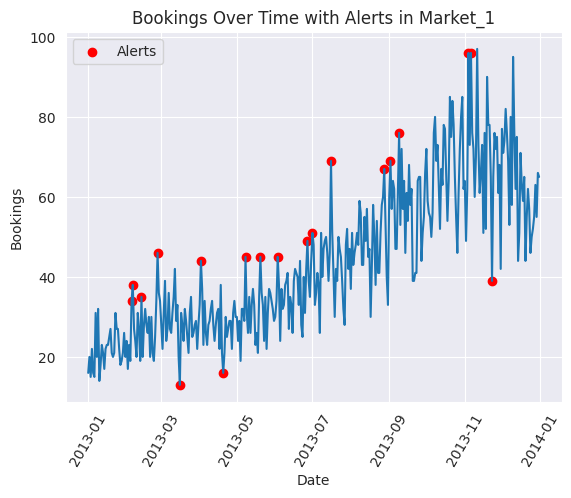

In [104]:
#Create a plot with seaborn to visualize market_1 bookings and alerts
sns.set_style("darkgrid")


sns.lineplot(data=df,
            x='ds',
            y='M1_bookings')

alerts_m1 = df[df['M1_alert']]

plt.scatter(x = alerts_m1['ds'],
            y = alerts_m1['bookings'],
            marker = 'o',
            color = 'red',
            label='Alerts')

plt.title('Bookings Over Time with Alerts in Market_1')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.xticks(rotation=60)
plt.legend()
plt.show()

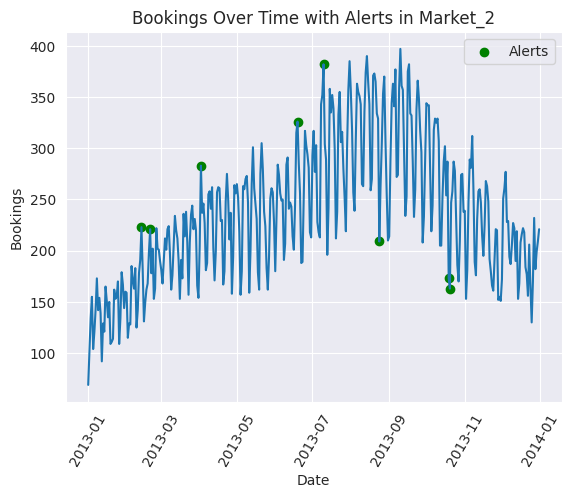

In [106]:
##Create a plot with seaborn to visualize market_2 bookings and alerts
sns.set_style("darkgrid")


sns.lineplot(data=df,
            x='ds',
            y='M2_bookings')

alerts_m2 = df[df['M2_alert']]

plt.scatter(x = alerts_m2['ds'],
            y = alerts_m2['bookings'],
            marker = 'o',
            color = 'green',
            label='Alerts')

plt.title('Bookings Over Time with Alerts in Market_2')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.xticks(rotation=60)
plt.legend()
plt.show()